In [ ]:
# convert a video into its animated form

In [ ]:
# imports 
root_path = '/home/linuxdualboot/github/misc projects/lover'
path = root_path + '/video'
os.chdir(root_path)

from PIL import Image 
import scipy.ndimage
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os
import cv2
import glob

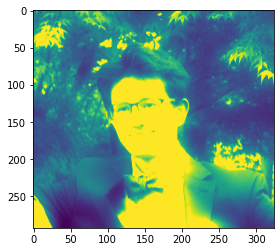

In [129]:
# first try this with an image

def dodge(front,back):
    result=front*255/(255-back) 
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')

def grayscale(rgb):
    return np.dot(rgb[...,:7], [0.299, 0.587, 0.114])


img ="picture.jpg"
video ="video.mp4"


s = imageio.imread(img)
g=grayscale(s)
i = g
b = scipy.ndimage.filters.gaussian_filter(i,sigma=10)
r= dodge(b,g)


%matplotlib inline 
plt.imshow(r, cmap="gray")


plt.imsave('img2.png', r, vmin=0, vmax=255)



In [89]:

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory /home/linuxdualboot/github/misc projects/lover/video failed


In [125]:
import shutil
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
    
new_frame_rate_change = 0.5
        
cap = cv2.VideoCapture("video.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

print('fps = ' + str(fps))
print('number of frames = ' + str(frame_count))
print('duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))

cap.release()

fps = 16.749956918835085
number of frames = 108
duration (S) = 6.447777777777778
duration (M:S) = 0:6.447777777777778


In [126]:
os.chdir(root_path)
vidcap = cv2.VideoCapture('video.mp4')
success,image = vidcap.read()
os.chdir(path)
frames = 0
while success:
    if frames % int(1/new_frame_rate_change) == 0:
        success,image = vidcap.read()
        if success:
            cv2.imwrite("%d.jpg" % frames, image)     # save frame as JPEG file
        # print('Read a new frame: ', success)
    else:
        success,image = vidcap.read()
    frames += 1

In [127]:
for filename in os.listdir(path):
    if filename.endswith(".jpg"): 
        img = filename 
        s = imageio.imread(img)
        g=grayscale(s)
        i = 255-g
        b = scipy.ndimage.filters.gaussian_filter(i,sigma=10)
        r= dodge(b,g)
        os.remove(filename) 
        plt.imsave(filename, r, cmap='gray', vmin=0, vmax=255)


/home/linuxdualboot/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [128]:
img_array_sorted = []
counter = 0 

for filename in os.listdir(path):

    img = cv2.imread(path + "/" + str(counter) + ".jpg")
    height, width, layers = img.shape
    size = (width,height)
    img_array_sorted.append(img)
    counter += int(1/new_frame_rate_change)

    
os.chdir(root_path)
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), int(fps*new_frame_rate_change), size)
 
for i in range(len(img_array_sorted)):
    out.write(img_array_sorted[i])
out.release()